In [1]:
import matplotlib.pyplot as plt
import csv
import os
import numpy as np
import pandas as pd

# Dataset

In [2]:
asana_blue = '#1BAFD0'
asana_green = '#38E8B0'
asana_red = '#FD636B'
asana_purple = '#6967CE'
asana_yellow = '#FFB900'

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
# for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

In [3]:
#dataset = 'fedemnist','cifar','shakespeare','stackoverflow'
# sweep = 'seedsweep','datasweep'

dataset_arr = ['cifar','fedemnist','shakespeare','stackoverflow']
num_seeds = 11 # also num_datasets
colors = {'naive':'darkgrey','fedavgbatch':'tan', 'peravgepochbatch':asana_red, 'perridgeepochbatch':asana_purple, 
          'peravg':'black', 'peravgonestep':'tab:brown', 'peravgHF':asana_blue, 'pfedme':asana_green}
ylim = dict()
method_name = {'naive':'Local Training','fedavgbatch':'FedAvg', 'peravgepochbatch':'FTFA', 
               'perridgeepochbatch':'RTFA', 'peravg':'MAML-FO', 'peravgonestep':'OneStep-MAML-FO', 'peravgHF':'MAML-HF',
              'pfedme': 'pFedMe'}
markers = {'naive':5,'fedavgbatch':'v', 'peravgepochbatch':'P', 'perridgeepochbatch':'s',
           'peravg':'D', 'peravgonestep':2,'peravgHF':'*', 'pfedme':'o'}

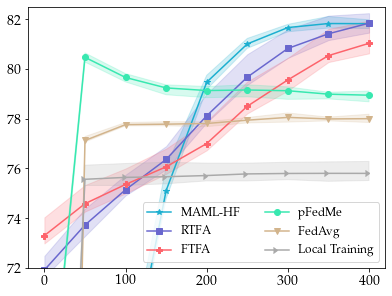

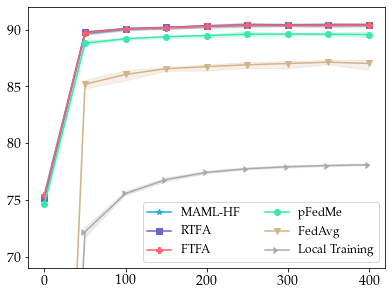

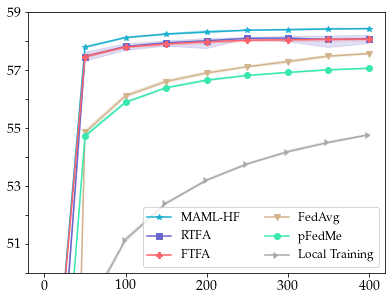

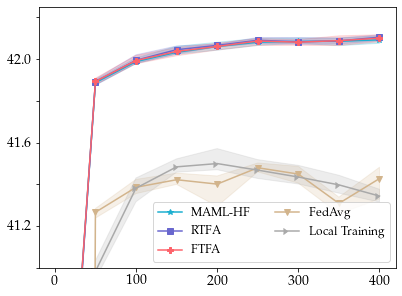

In [4]:
for dataset in dataset_arr:
    if dataset == 'cifar':
        sweep = 'datasweep'
        methods = [ 'peravgHF', 'perridgeepochbatch','peravgepochbatch','pfedme','fedavgbatch','naive']
        ylim[dataset] = [72,82.5]
    elif dataset == 'fedemnist': # include pfedme later
        sweep = 'seedsweep'
        methods = [ 'peravgHF','perridgeepochbatch','peravgepochbatch', 'pfedme','fedavgbatch','naive' ]
        ylim[dataset] = [69,92]
    elif dataset == 'shakespeare':
        sweep = 'seedsweep'
        methods = [ 'peravgHF','perridgeepochbatch','peravgepochbatch', 'fedavgbatch','pfedme','naive' ]
        ylim[dataset] = [50,59]
    elif dataset == 'stackoverflow':
        sweep = 'datasweep'
        methods = ['peravgHF', 'perridgeepochbatch','peravgepochbatch','fedavgbatch', 'naive']
        ylim[dataset] = [41,42.25]
    df_dict = dict()
    for method in methods:
        df_dict[method] = pd.read_csv('csv/' + sweep + '/' + dataset + '/wandb_export_' + dataset + '_' + method + '.csv')
    
    rounds = list(df_dict['fedavgbatch'].iloc[:,0])

    test_acc_dict = dict()
    for method in methods:
        test_acc_dict[method] = {'rounds': rounds, 'mean': None, 'min': None, 'max':None , 'median':None,'std':None}
        if method == 'naive':
            data_matrix = np.array([list(df_dict[method].iloc[rounds,3*i+1]) for i in range(num_seeds)])
        else:
            data_matrix = np.array([list(df_dict[method].iloc[:,3*i+1]) for i in range(num_seeds)])

        test_acc_dict[method]['mean'] = 100*np.mean(data_matrix,axis = 0)
        test_acc_dict[method]['max'] = 100*np.max(data_matrix,axis = 0)
        test_acc_dict[method]['min'] = 100*np.min(data_matrix,axis = 0)
        test_acc_dict[method]['median'] = 100*np.median(data_matrix,axis = 0)
        test_acc_dict[method]['std'] = 100*np.std(data_matrix,axis = 0)
    
    plt.rcParams.update({'font.size': 14})
    fig = plt.figure(figsize=(6.4, 4.8))
    ax = fig.add_subplot(111)
    for method in methods:
        ax.plot(test_acc_dict[method]['rounds'],test_acc_dict[method]['mean'],
                label = method_name[method], marker = markers[method], color = colors[method])
        ax.fill_between(test_acc_dict[method]['rounds'],test_acc_dict[method]['min'],test_acc_dict[method]['max'],
                    alpha = 0.2, color = colors[method])
    # plt.xlabel("Rounds")
    # plt.ylabel("Accuracy")
    #plt.title(dataset)
    plt.legend(ncol=2,fontsize = 12)
    plt.ylim(ylim[dataset])
    if dataset == 'shakespeare' or dataset == 'stackoverflow':
        plt.setp(ax.get_yticklabels()[::2], visible=False)
    plt.savefig("plots/"+ dataset + "_" + sweep +"_acc.pdf")

# Personalization benefits plots

In [46]:
#dataset = 'fedemnist','cifar','shakespeare','stackoverflow'
# sweep = 'seedsweep','datasweep'

dataset = 'cifar'
num_seeds = 5
ylim = {'cifar' : [73,82.5],'fedemnist' : [84,91]}

In [47]:
markers = {'global':'o','onestep':'v', '1':'*', '2':'D','5':'P', '10':'s'}
colors = {'global':'darkgrey','onestep':'tan', '1':asana_green, '2':asana_blue, 
          '5':asana_red, '10':asana_purple}
methods = ['peravgepochbatch','peravg', 'peravgHF']
epochs = ['10','5','2','1','onestep','global']
epochs_name = {'10':'10 epochs','5':'5 epochs','2':'2 epochs','1':'1 epoch','onestep':'1 batch','global':'global'}

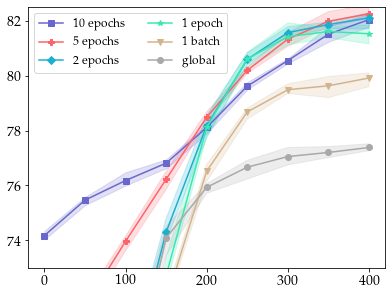

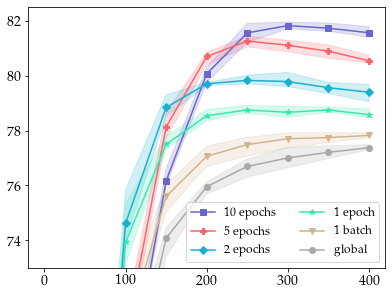

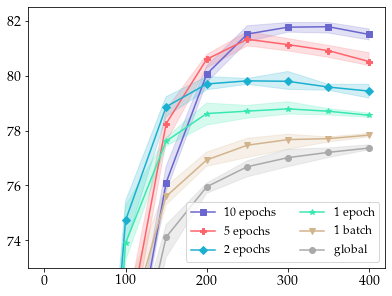

In [48]:
df_dict = {'peravgepochbatch':dict(),'peravg':dict(), 'peravgHF':dict()}
for method in methods:
    for epoch in epochs:
        df_dict[method][epoch] = pd.read_csv('csv/' + 'pers-benefits/' + dataset + '/wandb_export_' + dataset + '_'
                                             + method + '_'+ epoch +'.csv')

test_acc_dict = {'peravgepochbatch':dict(),'peravg':dict(), 'peravgHF':dict()}
for method in methods:
    for epoch in epochs:
        test_acc_dict[method][epoch] = {'rounds': rounds, 'mean': None, 'min': None, 
                                        'max':None , 'median':None,'std':None}

for method in methods:
    for epoch in epochs:
        data_matrix = np.array([list(df_dict[method][epoch].iloc[:,3*i+1]) for i in range(num_seeds)])
    
        test_acc_dict[method][epoch]['mean'] = 100*np.mean(data_matrix,axis = 0)
        test_acc_dict[method][epoch]['max'] = 100*np.max(data_matrix,axis = 0)
        test_acc_dict[method][epoch]['min'] = 100*np.min(data_matrix,axis = 0)
        test_acc_dict[method][epoch]['median'] = 100*np.median(data_matrix,axis = 0)
        test_acc_dict[method][epoch]['std'] = 100*np.std(data_matrix,axis = 0)

for method in methods:
    fig = plt.figure(figsize=(6.4, 4.8))
    ax = fig.add_subplot(111)
    for epoch in epochs:
        ax.plot(test_acc_dict[method][epoch]['rounds'],test_acc_dict[method][epoch]['mean'],
                label = epochs_name[epoch], marker = markers[epoch], color = colors[epoch])
        ax.fill_between(test_acc_dict[method][epoch]['rounds'],test_acc_dict[method][epoch]['min'],
                        test_acc_dict[method][epoch]['max'],alpha = 0.2, color = colors[epoch])
#     plt.xlabel("Rounds")
#     plt.ylabel("Accuracy")
#     plt.title(method)
    plt.legend(ncol=2,fontsize = 12)
    plt.ylim(ylim[dataset])
    plt.savefig("plots/"+ "pers_benefits_" + dataset + "_" + method + "_acc.pdf")